[*********************100%***********************]  1 of 1 completed


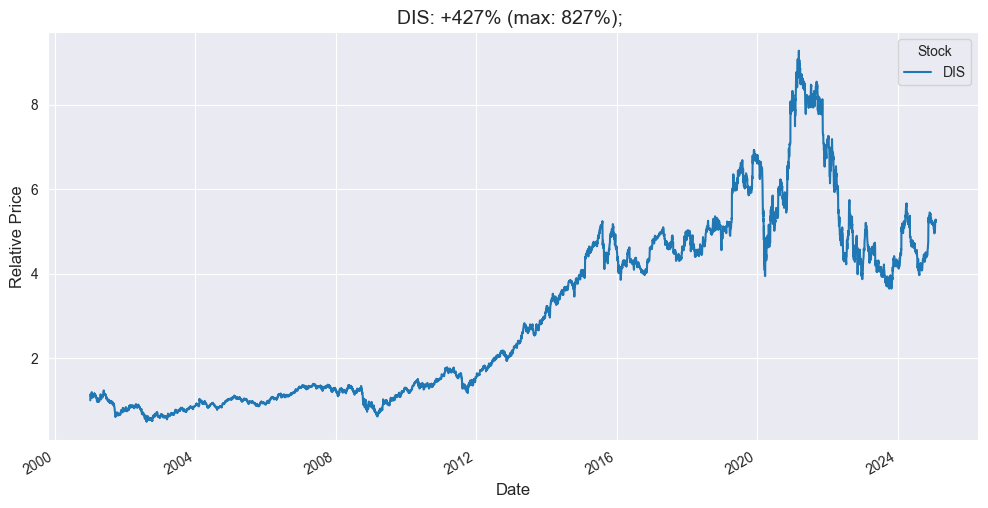

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# import tkinter as tk
# from tkinter import simpledialog

# root = tk.Tk()
# root.withdraw()  # Hide the root window
# tickers_input = simpledialog.askstring("Input", "Enter tickers:")
# tickers = tickers_input.split(" ")
# start = simpledialog.askstring("Input", "Enter a start date:")

tickers = [
    "DIS"
]

start = "2001-01-01"
end = "2025-01-31"

# Download data
df = yf.download(tickers, start=start, end=end)

# Extract dates from index
dates = df.index

# Initialize dictionary for normalized prices
di = {'dates': dates}

# Normalize each ticker's price (relative to the first value)
for ticker in tickers:
    data = df['Close'][ticker].tolist()  # Extract close prices
    first_el = data[0]  # First price for normalization
    lst = [price / first_el for price in data]  # Compute normalized prices
    di[ticker] = lst  # Store in dictionary

# Convert to DataFrame and set index
df = pd.DataFrame(data=di).set_index('dates')

# Plot the normalized stock prices
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")  # Use seaborn style
df.plot(ax=plt.gca())  # Use current axis

title = ""

for ticker in tickers:
    perc_change = int(100*(di[ticker][::-1][0] - 1))
    max_change = int(100*(max(di[ticker])-1))
    el1 = str(perc_change) + "%"
    el2 = str(max_change) + "%"
    if perc_change >= 0:
        title += f"{ticker}: +{el1} (max: {el2}); "
    else: 
        title += f"{ticker}: {el1} (max: {el2}); "

# Add title and labels
plt.title(f"{title}", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Relative Price", fontsize=12)
plt.legend(title="Stock", fontsize=10)
plt.show()


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# import tkinter as tk
# from tkinter import simpledialog

# root = tk.Tk()
# root.withdraw()  # Hide the root window
# tickers_input = simpledialog.askstring("Input", "Enter tickers:")
# tickers = tickers_input.split(" ")
# start = simpledialog.askstring("Input", "Enter a start date:")

tickers = [
    "RB=F"
]

start = "2010-01-01"
end = "2025-01-31"

# Download data
df = yf.download(tickers, start=start, end=end)

# Extract dates from index
dates = df.index

# Initialize dictionary for normalized prices
di = {'dates': dates}

# Normalize each ticker's price (relative to the first value)
for ticker in tickers:
    data = df['Close'][ticker].tolist()  # Extract close prices
    first_el = data[0]  # First price for normalization
    lst = [price / first_el for price in data]  # Compute normalized prices
    di[ticker] = lst  # Store in dictionary

# Convert to DataFrame and set index
df = pd.DataFrame(data=di).set_index('dates')

# Plot the normalized stock prices
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")  # Use seaborn style
df.plot(ax=plt.gca())  # Use current axis

title = ""

for ticker in tickers:
    perc_change = int(100*(di[ticker][::-1][0] - 1))
    max_change = int(100*(max(di[ticker])-1))
    el1 = str(perc_change) + "%"
    el2 = str(max_change) + "%"
    if perc_change >= 0:
        title += f"{ticker}: +{el1} (max: {el2}); "
    else: 
        title += f"{ticker}: {el1} (max: {el2}); "

# Add title and labels
# plt.title(f"{title}", fontsize=14)
# plt.xlabel("Date", fontsize=12)
# plt.ylabel("Relative Price", fontsize=12)
# plt.legend(title="Stock", fontsize=10)
# plt.show()

conn = sqlite3.connect("test.db")

dates = df[tickers[0]].index.tolist()
prices = df[tickers[0]].tolist()

df = pd.DataFrame(data={
    "date": dates,
    "price": prices
})

df.to_sql('gasoline', conn, if_exists='replace', index=False)

# Query from the table using SQLite
query = """
with

a as (SELECT
strftime('%Y', date) year
, strftime('%m', date) month
, date
, price
FROM gasoline
)

, b as (select
year
, month
, date
, price
, avg(price) over (partition by year) year_avg
from a
)

, c as (select
year
, month
, date
, price
, year_avg
, price/year_avg as price_to_year
from b
)

select
month
, avg(price_to_year)
from c
group by 1
order by 1 asc
;
"""
result = pd.read_sql(query, conn)

result

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RB=F']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


IndexError: list index out of range

In [47]:
import tkinter as tk
from tkinter import simpledialog

def get_user_input():
    root = tk.Tk()
    root.withdraw()  # Hide the root window
    user_input = simpledialog.askstring("Input", "Enter a string value:")
    
    if user_input is not None:
        print("You entered:", user_input)
    else:
        print("No input provided")

get_user_input()

You entered: Hello there
